In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import fastparquet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split

In [2]:
# Load  dataset
df = pd.read_parquet("building_energy_with_complete_feature_eng.parquet")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,date,building_id,daily_consumption,sqm,lat,lng,has_location,airTemperature,dewTemperature,seaLvlPressure,windDirection,windSpeed,log_daily_consumption,year,month,dayofweek,dayofyear,is_weekend,month_sin,month_cos,dow_sin,dow_cos,log_sqm,consumption_per_sqm,log_consumption_per_sqm,primaryspaceusage_Entertainment/public assembly,primaryspaceusage_Food sales and service,primaryspaceusage_Healthcare,primaryspaceusage_Lodging/residential,primaryspaceusage_Manufacturing/industrial,primaryspaceusage_Office,primaryspaceusage_Other,primaryspaceusage_Parking,primaryspaceusage_Public services,primaryspaceusage_Religious worship,primaryspaceusage_Retail,primaryspaceusage_Services,primaryspaceusage_Technology/science,primaryspaceusage_Utility,primaryspaceusage_Warehouse/storage,timezone_Europe/London,timezone_US/Central,timezone_US/Eastern,timezone_US/Mountain,timezone_US/Pacific,is_outlier_building,site_id_orig,temp_diff,rolling_temp_mean_3d,monthly_temp_anomaly,site_id_Bobcat,site_id_Bull,site_id_Cockatoo,site_id_Crow,site_id_Eagle,site_id_Fox,site_id_Gator,site_id_Hog,site_id_Lamb,site_id_Moose,site_id_Mouse,site_id_Peacock,site_id_Rat,site_id_Robin,site_id_Wolf,relative_humidity,wind_power,wind_u,wind_v
0,2016-01-01,Bear_public_Orville,300.5108,2700.0,37.871903,-122.260729,1,6.175,-5.229167,1020.891667,68.75,3.070833,5.708806,2016,1,4,1,0,0.5,0.866025,-0.433884,-0.900969,7.901377,0.111300,0.105531,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,Bear,11.404167,6.175,-4.737231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.855907,9.430017,1.112987,2.862041
1,2016-01-01,Bear_education_Lidia,189.5000,2824.3,37.871903,-122.260729,1,6.175,-5.229167,1020.891667,68.75,3.070833,5.249652,2016,1,4,1,0,0.5,0.866025,-0.433884,-0.900969,7.946370,0.067096,0.064941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Bear,11.404167,6.175,-4.737231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.855907,9.430017,1.112987,2.862041
2,2016-01-01,Bear_education_Nanette,2625.9552,6150.5,37.871903,-122.260729,1,6.175,-5.229167,1020.891667,68.75,3.070833,7.873581,2016,1,4,1,0,0.5,0.866025,-0.433884,-0.900969,8.724451,0.426950,0.355539,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Bear,11.404167,6.175,-4.737231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.855907,9.430017,1.112987,2.862041
3,2016-01-01,Bear_education_Lewis,371.6389,4588.3,37.871903,-122.260729,1,6.175,-5.229167,1020.891667,68.75,3.070833,5.920610,2016,1,4,1,0,0.5,0.866025,-0.433884,-0.900969,8.431483,0.080997,0.077884,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Bear,11.404167,6.175,-4.737231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.855907,9.430017,1.112987,2.862041
4,2016-01-01,Bear_science_Alison,1801.9500,4945.6,37.871903,-122.260729,1,6.175,-5.229167,1020.891667,68.75,3.070833,7.497179,2016,1,4,1,0,0.5,0.866025,-0.433884,-0.900969,8.506456,0.364354,0.310681,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,Bear,11.404167,6.175,-4.737231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.855907,9.430017,1.112987,2.862041


In [5]:
df = df.drop('building_id', axis=1)
df = df.drop('site_id_orig', axis=1)
df = df.drop('consumption_per_sqm', axis=1)
df = df.drop('log_consumption_per_sqm', axis=1)

In [6]:
df.head()

,date,daily_consumption,sqm,lat,lng,has_location,airTemperature,dewTemperature,seaLvlPressure,windDirection,windSpeed,log_daily_consumption,year,month,dayofweek,dayofyear,is_weekend,month_sin,month_cos,dow_sin,dow_cos,log_sqm,primaryspaceusage_Entertainment/public assembly,primaryspaceusage_Food sales and service,primaryspaceusage_Healthcare,primaryspaceusage_Lodging/residential,primaryspaceusage_Manufacturing/industrial,primaryspaceusage_Office,primaryspaceusage_Other,primaryspaceusage_Parking,primaryspaceusage_Public services,primaryspaceusage_Religious worship,primaryspaceusage_Retail,primaryspaceusage_Services,primaryspaceusage_Technology/science,primaryspaceusage_Utility,primaryspaceusage_Warehouse/storage,timezone_Europe/London,timezone_US/Central,timezone_US/Eastern,timezone_US/Mountain,timezone_US/Pacific,is_outlier_building,temp_diff,rolling_temp_mean_3d,monthly_temp_anomaly,site_id_Bobcat,site_id_Bull,site_id_Cockatoo,site_id_Crow,site_id_Eagle,site_id_Fox,site_id_Gator,site_id_Hog,site_id_Lamb,site_id_Moose,site_id_Mouse,site_id_Peacock,site_id_Rat,site_id_Robin,site_id_Wolf,relative_humidity,wind_power,wind_u,wind_v
0,2016-01-01,300.5108,2700.0,37.871903,-122.260729,1,6.175,-5.229167,1020.891667,68.75,3.070833,5.708806,2016,1,4,1,0,0.5,0.866025,-0.433884,-0.900969,7.901377,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,11.404167,6.175,-4.737231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.855907,9.430017,1.112987,2.862041
1,2016-01-01,189.5000,2824.3,37.871903,-122.260729,1,6.175,-5.229167,1020.891667,68.75,3.070833,5.249652,2016,1,4,1,0,0.5,0.866025,-0.433884,-0.900969,7.946370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,11.404167,6.175,-4.737231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.855907,9.430017,1.112987,2.862041
2,2016-01-01,2625.9552,6150.5,37.871903,-122.260729,1,6.175,-5.229167,1020.891667,68.75,3.070833,7.873581,2016,1,4,1,0,0.5,0.866025,-0.433884,-0.900969,8.724451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,11.404167,6.175,-4.737231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.855907,9.430017,1.112987,2.862041
3,2016-01-01,371.6389,4588.3,37.871903,-122.260729,1,6.175,-5.229167,1020.891667,68.75,3.070833,5.920610,2016,1,4,1,0,0.5,0.866025,-0.433884,-0.900969,8.431483,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,11.404167,6.175,-4.737231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.855907,9.430017,1.112987,2.862041
4,2016-01-01,1801.9500,4945.6,37.871903,-122.260729,1,6.175,-5.229167,1020.891667,68.75,3.070833,7.497179,2016,1,4,1,0,0.5,0.866025,-0.433884,-0.900969,8.506456,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,11.404167,6.175,-4.737231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.855907,9.430017,1.112987,2.862041


In [7]:
# Define target
target_col = "log_daily_consumption"  # log used version for stability
y = df["log_daily_consumption"]

In [8]:
# Define features
exclude_cols = ["daily_consumption", "log_daily_consumption", "date"]
X = df.drop(columns=exclude_cols)

In [9]:
# Select numeric columns to scale (excluding one-hot encoded)
num_cols = X.select_dtypes(include=["float64", "int64"]).columns
cat_cols = [c for c in X.columns if c not in num_cols]

In [10]:
# Scale numeric columns
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[num_cols] = scaler.fit_transform(X[num_cols])

In [11]:
# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [12]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Scaled numeric columns:", len(num_cols))
print("Categorical columns (not scaled):", len(cat_cols))

Train shape: (734508, 62)
Test shape: (183628, 62)
Scaled numeric columns: 38
Categorical columns (not scaled): 24


In [13]:
# Sample a fraction of training data
X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

In [14]:
print(f"Using {len(X_train_sample):,} samples out of {len(X_train):,} for training (~10%)")

Using 73,451 samples out of 734,508 for training (~10%)


In [15]:
# Simple imputation for missing values
X_train_s = X_train_sample.copy()
X_test_s = X_test.copy()

# For numeric columns → fill with mean
num_cols = X_train_s.select_dtypes(include=["float64", "int64"]).columns
X_train_s[num_cols] = X_train_s[num_cols].fillna(X_train_s[num_cols].mean())
X_test_s[num_cols] = X_test_s[num_cols].fillna(X_train_s[num_cols].mean())  # use train means

# For categorical columns (if any) → fill with mode
cat_cols = X_train_s.select_dtypes(include=["bool", "object"]).columns
for c in cat_cols:
    X_train_s[c].fillna(X_train_s[c].mode()[0], inplace=True)
    X_test_s[c].fillna(X_train_s[c].mode()[0], inplace=True)

print(" Missing values handled successfully")

 Missing values handled successfully


In [16]:
#  Train Linear Regression on sampled data
print("Training Linear Regression on sample")
lr = LinearRegression()
lr.fit(X_train_s, y_train_sample)
print("Linear Regression trained successfully")

Training Linear Regression on sample
Linear Regression trained successfully


In [17]:
# Predict
y_pred_lr = lr.predict(X_test_s)

In [18]:
# Evaluate in log-space
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [19]:
# Back-transform predictions to kWh
y_test_kwh = np.expm1(y_test)
y_pred_lr_kwh = np.expm1(y_pred_lr)
mae_lr_kwh = mean_absolute_error(y_test_kwh, y_pred_lr_kwh)
rmse_lr_kwh = mean_squared_error(y_test_kwh, y_pred_lr_kwh)

In [20]:
print("Linear Regression Performance (Sampled):")
print(f"Log-space → MAE: {mae_lr:.3f}, RMSE: {rmse_lr:.3f}, R²: {r2_lr:.3f}")
print(f"Original kWh → MAE: {mae_lr_kwh:.3f}, RMSE: {rmse_lr_kwh:.3f}")

Linear Regression Performance (Sampled):
Log-space → MAE: 0.774, RMSE: 1.301, R²: 0.640
Original kWh → MAE: 1979.301, RMSE: 130126120.956


In [21]:
# Random Forest (train on same sample for consistency)
print("Training Random Forest on same sample")
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    n_jobs=-1,
    random_state=42
)

Training Random Forest on same sample


In [22]:
rf.fit(X_train_s, y_train_sample)
print("Random Forest trained successfully!")

Random Forest trained successfully!


In [24]:
# Predict and evaluate
y_pred_rf = rf.predict(X_test_s)

In [25]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [26]:
y_pred_rf_kwh = np.expm1(y_pred_rf)
mae_rf_kwh = mean_absolute_error(y_test_kwh, y_pred_rf_kwh)
rmse_rf_kwh = mean_squared_error(y_test_kwh, y_pred_rf_kwh)

In [27]:
print("Random Forest Performance (Sampled):")
print(f"Log-space → MAE: {mae_rf:.3f}, RMSE: {rmse_rf:.3f}, R²: {r2_rf:.3f}")
print(f"Original kWh → MAE: {mae_rf_kwh:.3f}, RMSE: {rmse_rf_kwh:.3f}")

Random Forest Performance (Sampled):
Log-space → MAE: 0.345, RMSE: 0.348, R²: 0.904
Original kWh → MAE: 961.435, RMSE: 115303805.149


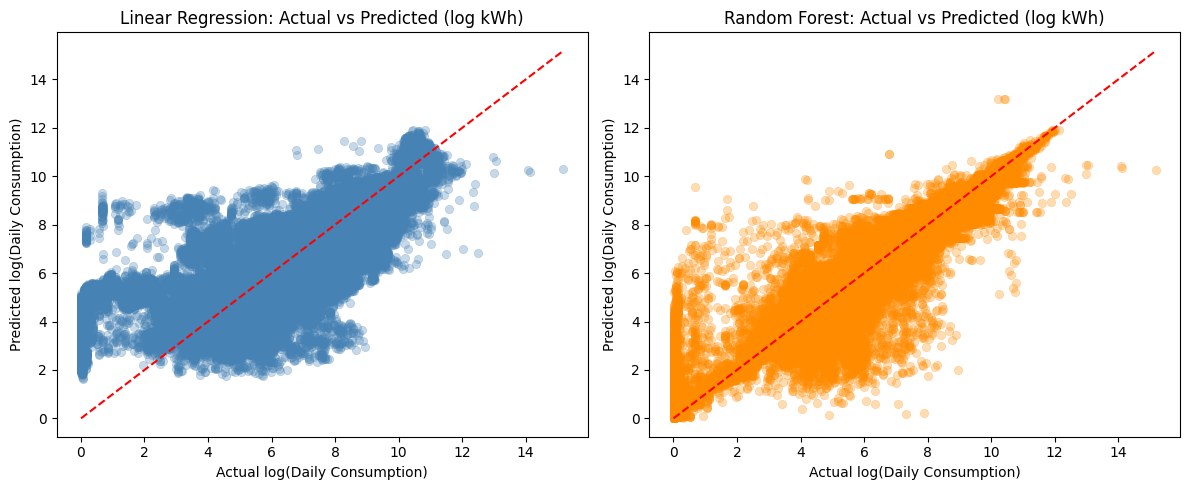

In [28]:
# Scatter Plots: Actual vs Predicted (Log-space) 
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.3, edgecolor=None, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear Regression: Actual vs Predicted (log kWh)")
plt.xlabel("Actual log(Daily Consumption)")
plt.ylabel("Predicted log(Daily Consumption)")

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3, edgecolor=None, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted (log kWh)")
plt.xlabel("Actual log(Daily Consumption)")
plt.ylabel("Predicted log(Daily Consumption)")

plt.tight_layout()
plt.show()

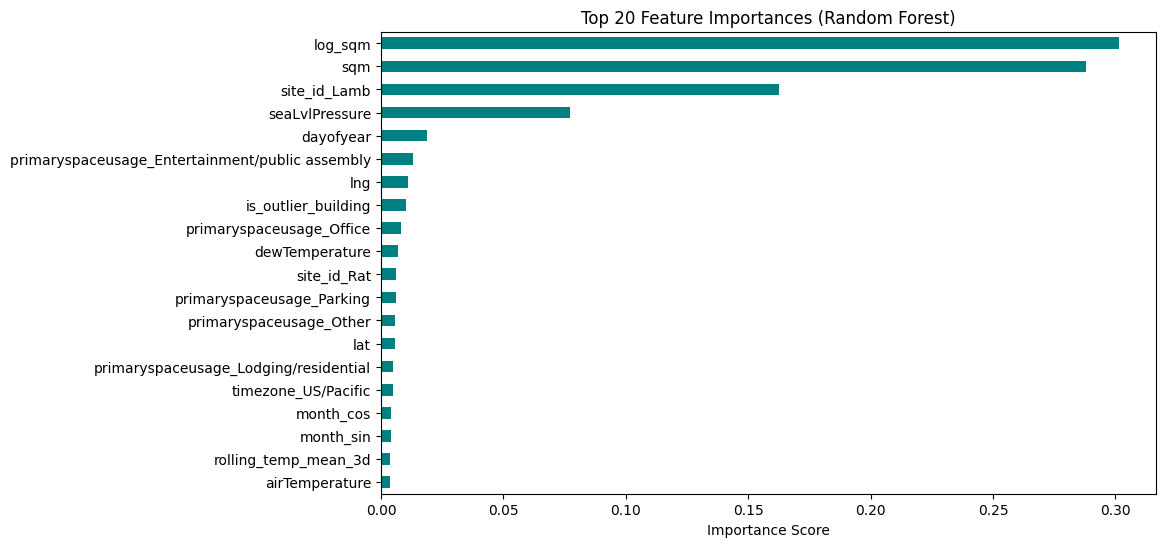


Top 10 Features (Random Forest):
log_sqm                                            0.301505
sqm                                                0.288125
site_id_Lamb                                       0.162618
seaLvlPressure                                     0.077393
dayofyear                                          0.018906
primaryspaceusage_Entertainment/public assembly    0.013108
lng                                                0.010950
is_outlier_building                                0.010211
primaryspaceusage_Office                           0.008377
dewTemperature                                     0.006825
dtype: float64


In [29]:
#  Random Forest Feature Importance 
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X_train_s.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.head(20).plot(kind='barh', color='teal')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()

print("\nTop 10 Features (Random Forest):")
print(feat_imp.head(10))

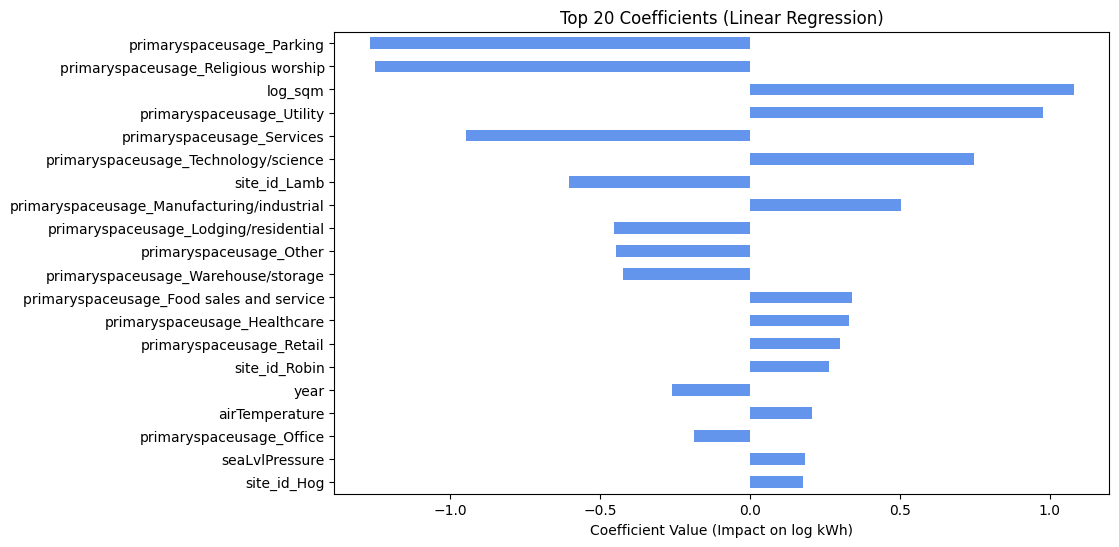


Top 10 Influential Features (Linear Regression):
primaryspaceusage_Parking                    -1.268096
primaryspaceusage_Religious worship          -1.251612
log_sqm                                       1.081581
primaryspaceusage_Utility                     0.978061
primaryspaceusage_Services                   -0.947075
primaryspaceusage_Technology/science          0.745757
site_id_Lamb                                 -0.601953
primaryspaceusage_Manufacturing/industrial    0.503311
primaryspaceusage_Lodging/residential        -0.452482
primaryspaceusage_Other                      -0.445858
dtype: float64


In [30]:
# Get coefficients and sort by absolute value
coefs = pd.Series(lr.coef_, index=X_train_s.columns)
coefs_sorted = coefs.reindex(coefs.abs().sort_values(ascending=False).index)

plt.figure(figsize=(10,6))
coefs_sorted.head(20).plot(kind='barh', color='cornflowerblue')
plt.title("Top 20 Coefficients (Linear Regression)")
plt.gca().invert_yaxis()
plt.xlabel("Coefficient Value (Impact on log kWh)")
plt.show()

print("\nTop 10 Influential Features (Linear Regression):")
print(coefs_sorted.head(10))